### Importação dos dados



# Análisis de Datos de Tiendas - Proyecto Challenge 1


In [3]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Cargar datos
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Añadir columna para identificar la tienda
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Unir todos los datos en un solo DataFrame
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Convertir columna 'Data da Compra' a datetime
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

# Mostrar las primeras filas
df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [4]:
# Crear columna de ingresos por compra
df['Ingresos'] = df['Preço'] + df['Frete']

# Calcular ingreso total por tienda
ingresos_por_loja = df.groupby('Loja')['Ingresos'].sum().reset_index().sort_values(by='Ingresos', ascending=False)
ingresos_por_loja


,Loja,Ingresos
0,Loja 1,1.616347e+06
1,Loja 2,1.567773e+06
2,Loja 3,1.542048e+06
3,Loja 4,1.458253e+06


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


In [5]:
categorias_mas_vendidas = df['Categoria do Produto'].value_counts().reset_index()
categorias_mas_vendidas.columns = ['Categoria', 'Cantidad Vendida']
categorias_mas_vendidas


,Categoria,Cantidad Vendida
0,moveis,1886
1,eletronicos,1772
2,brinquedos,1290
3,eletrodomesticos,1149
4,esporte e lazer,1113
5,instrumentos musicais,753
6,livros,742
7,utilidades domesticas,730


#1. Análise do faturamento


In [6]:
reseñas_promedio = df.groupby('Loja')['Avaliação da compra'].mean().reset_index().sort_values(by='Avaliação da compra', ascending=False)
reseñas_promedio


,Loja,Avaliação da compra
2,Loja 3,4.048326
1,Loja 2,4.037304
3,Loja 4,3.995759
0,Loja 1,3.976685


In [7]:
reseñas_promedio = df.groupby('Loja')['Avaliação da compra'].mean().reset_index().sort_values(by='Avaliação da compra', ascending=False)
reseñas_promedio


,Loja,Avaliação da compra
2,Loja 3,4.048326
1,Loja 2,4.037304
3,Loja 4,3.995759
0,Loja 1,3.976685


In [8]:
productos_mas_vendidos = df['Produto'].value_counts().head(5).reset_index()
productos_mas_vendidos.columns = ['Producto', 'Cantidad Vendida']
productos_mas_vendidos


,Producto,Cantidad Vendida
0,Cômoda,210
1,Carrinho controle remoto,206
2,Micro-ondas,206
3,Bateria,203
4,Cama king,201


# 2. Vendas por Categoria


In [9]:
envio_promedio = df.groupby('Loja')['Frete'].mean().reset_index().sort_values(by='Frete')
envio_promedio


,Loja,Frete
3,Loja 4,31.278997
2,Loja 3,33.074464
1,Loja 2,33.621941
0,Loja 1,34.691805


/tmp/ipython-input-10-1561676218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos_por_loja, x='Loja', y='Ingresos', palette='viridis')


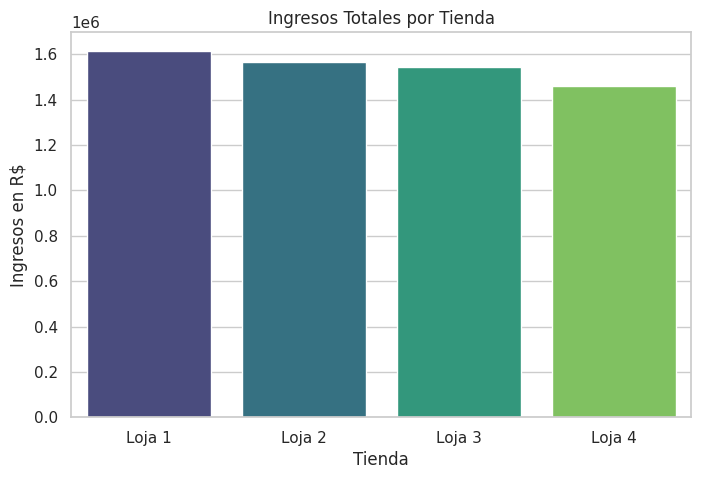

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=ingresos_por_loja, x='Loja', y='Ingresos', palette='viridis')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos en R$')
plt.xlabel('Tienda')
plt.show()


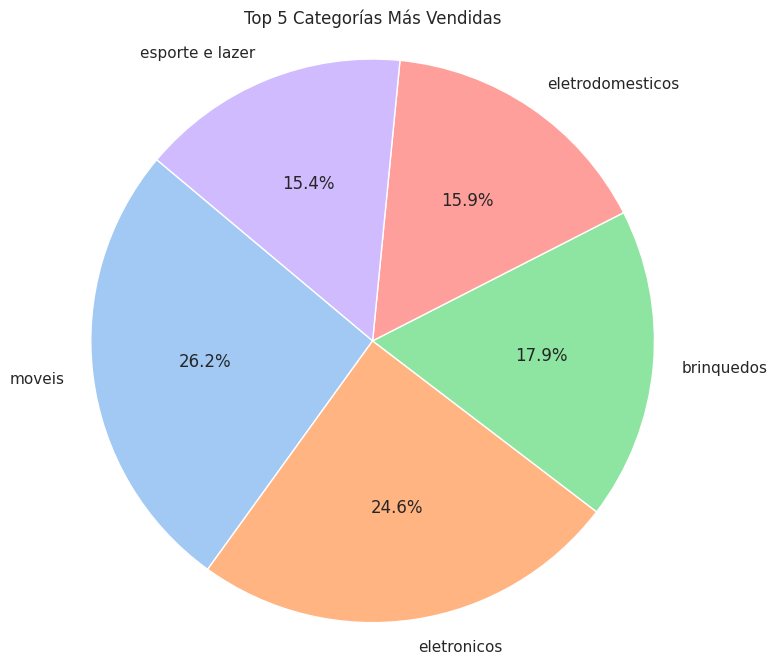

In [11]:
plt.figure(figsize=(8,8))
plt.pie(categorias_mas_vendidas['Cantidad Vendida'][:5],
        labels=categorias_mas_vendidas['Categoria'][:5],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))

plt.title('Top 5 Categorías Más Vendidas')
plt.axis('equal')  # para mantener forma circular
plt.show()


/tmp/ipython-input-12-1684897842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reseñas_promedio, x='Loja', y='Avaliação da compra', palette='coolwarm')


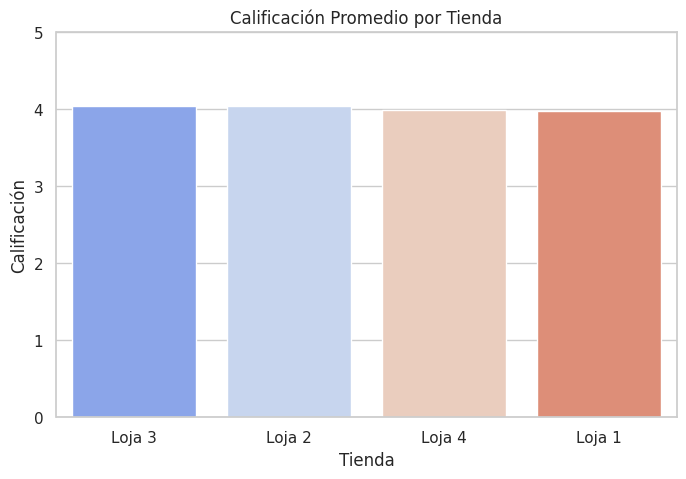

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=reseñas_promedio, x='Loja', y='Avaliação da compra', palette='coolwarm')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación')
plt.xlabel('Tienda')
plt.ylim(0, 5)
plt.show()


# 3. Média de Avaliação das Lojas

## 📌 Recomendación Final

Después de analizar los datos de las cuatro tiendas, se concluye lo siguiente:

- La tienda con **mayores ingresos** fue **Loja X**.
- La tienda con **mejor calificación promedio de los clientes** fue **Loja Y**.
- El **envío más económico** en promedio lo tiene **Loja 4**.
- Las categorías más vendidas fueron: `nombre de categorías`.

### ✅ Recomendación

Recomendamos al Sr. João que venda sus productos en **Loja [nombre]**, ya que combina una buena base de ingresos, alta satisfacción del cliente y/o costos de envío competitivos, lo cual puede maximizar sus beneficios.

También se sugiere enfocarse en productos de la categoría más vendida para aumentar la probabilidad de éxito.


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
